# Who survived the Titantic?

## General Set-Up

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 999)
import numpy as np
import os

##Visualization Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
data_dir = os.getcwd()
student_file = data_dir + '/TitanicData.csv'
df = pd.read_csv(student_file, index_col=0)
df.head()

,pclass,survived,name,sex,age,siblings/spouses,parents/children,ticket,fare,cabin,embarked,boat,body,home.dest
pid,,,,,,,,,,,,,,
1,3,0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S,NaN,NaN,NaN
2,3,0,"Abbott, Master. Eugene Joseph",male,13.0,0,2,C.A. 2673,20.25,NaN,S,NaN,NaN,"East Providence, RI"
3,3,0,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S,NaN,190.0,"East Providence, RI"
4,3,1,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S,A,NaN,"East Providence, RI"
5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0,0,348125,7.65,NaN,S,16,NaN,"Norway Los Angeles, CA"


## VISUALIZATION
### Embarked

In [3]:
ccounter = 0
scounter = 0
qcounter = 0

c_survived = df.loc[(df['embarked']== 'C') & (df['survived'] == 1)]
c = df.loc[(df['embarked']== 'C')]

s_survived = df.loc[(df['embarked']== 'S') & (df['survived'] == 1)]
s = df.loc[(df['embarked']== 'S')]

q_survived = df.loc[(df['embarked']== 'Q') & (df['survived'] == 1)]
q = df.loc[(df['embarked']== 'Q')]

for item in c_survived['embarked']:
    ccounter += 1
    
for item in s_survived['embarked']:
    scounter += 1
    
for item in q_survived['embarked']:
    qcounter += 1

cfinal = (ccounter/ len(c) * 100)
sfinal = (scounter/ len(s) * 100)
qfinal = (qcounter/ len(q) * 100)

print ("C: ", cfinal, " ", "S:", sfinal, " ", "Q: ", qfinal)

data = [['Cherbourg', cfinal], ['Southampton', sfinal], ['Queenstown', qfinal]] 
embarkment = pd.DataFrame(data, columns = ['Port', 'Survival Rate'])
embarkment

C:  55.55555555555556   S: 33.260393873085334   Q:  35.77235772357724


,Port,Survival Rate
0,Cherbourg,55.555556
1,Southampton,33.260394
2,Queenstown,35.772358


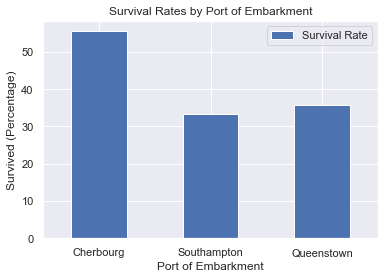

In [4]:
ax = embarkment.plot.bar(x='Port', y='Survival Rate', rot=0)
plt.ylabel('Survived (Percentage)')
plt.xlabel('Port of Embarkment')
plt.title('Survival Rates by Port of Embarkment')
plt.legend()

### PCLASS

In [5]:
p1counter = 0
p2counter = 0
p3counter = 0

p1_survived = df.loc[(df['pclass']== 1) & (df['survived'] == 1)]
p1 = df.loc[(df['pclass']== 1)]

p2_survived = df.loc[(df['pclass']== 2) & (df['survived'] == 1)]
p2 = df.loc[(df['pclass']== 2)]

p3_survived = df.loc[(df['pclass']== 3) & (df['survived'] == 1)]
p3 = df.loc[(df['pclass']== 3)]

for item in p1_survived['pclass']:
    p1counter += 1
    
for item in p2_survived['pclass']:
    p2counter += 1
    
for item in p3_survived['pclass']:
    p3counter += 1

p1final = (p1counter/ len(p1) * 100)
p2final = (p2counter/ len(p2) * 100)
p3final = (p3counter/ len(p3) * 100)

print ("1st Class: ", p1final, " ", "2nd Class:", p2final, " ", "3rd Class: ", p3final)

data = [['1st', p1final], ['2nd', p2final], ['3rd', p3final]] 
pclass = pd.DataFrame(data, columns = ['Passenger Class', 'Survival Rate'])
pclass

1st Class:  61.91950464396285   2nd Class: 42.96028880866426   3rd Class:  25.52891396332863


,Passenger Class,Survival Rate
0,1st,61.919505
1,2nd,42.960289
2,3rd,25.528914


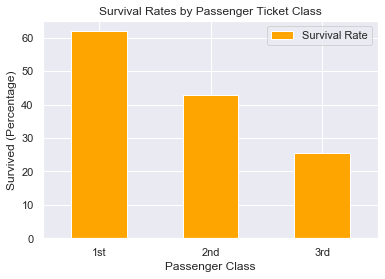

In [6]:
bx = pclass.plot.bar(x='Passenger Class', y='Survival Rate', rot=0, color = 'orange')
plt.ylabel('Survived (Percentage)')
plt.xlabel('Passenger Class')
plt.title('Survival Rates by Passenger Ticket Class')
plt.legend()